In [308]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

In [207]:
df = pd.read_csv('datasets_117_1001_responses.csv')

In [208]:
pd.options.display.max_columns=None

In [209]:
df.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.

In [210]:
survey_df = df.copy()

In [211]:
smoking = survey_df['Smoking']

In [212]:
smoking.unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [213]:
smoking_dummies = pd.get_dummies(survey_df['Smoking'])

In [214]:
smoking_dummies.head()

,current smoker,former smoker,never smoked,tried smoking
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1


In [215]:
survey_df = survey_df.drop(['Smoking'], axis= 1)

In [216]:
new_df = pd.concat([survey_df, smoking_dummies], axis=1, sort=False)

In [218]:
Alcohol = pd.get_dummies(new_df['Alcohol'])

In [219]:
new_df = new_df.drop(['Alcohol'],axis=1)

In [220]:
new_df = pd.concat([new_df, Alcohol],axis=1,sort=False)

In [221]:
Punctuality =pd.get_dummies(new_df['Punctuality'])

In [222]:
new_df = new_df.drop(['Punctuality'],axis = 1)

In [223]:
new_df = pd.concat([new_df, Punctuality], axis=1)

In [224]:
Lying = pd.get_dummies(new_df['Lying'])

In [225]:
new_df = new_df.drop(['Lying'], axis=1)

In [226]:
new_df = pd.concat([new_df, Lying], axis=1)

In [227]:
Internet = pd.get_dummies(new_df['Internet_usage'])

In [228]:
new_df['Internet_usage'].unique()

array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

In [232]:
new_df = new_df.drop(['Internet_usage'], axis = 1)

In [233]:
new_df = pd.concat([new_df, Internet], axis =1)

In [237]:
Gender = pd.get_dummies(new_df['Gender'])

In [238]:
new_df = new_df.drop(['Gender'], axis = 1)

In [239]:
new_df = pd.concat([new_df, Gender], axis = 1)

In [ ]:
slow_song_people = survey_df[survey_df['Slow songs or fast songs']==1]

In [ ]:
slow_song_people.head()

In [241]:
Left_right_handed = pd.get_dummies(new_df['Left_right_handed'])
Education = pd.get_dummies(new_df['Education'])
Only_child = pd.get_dummies(new_df['Only_child'])
Village_town = pd.get_dummies(new_df['Village_town'])
House_block_of_flats = pd.get_dummies(new_df['House_block_of_flats'])
new_df = new_df.drop(['Left_right_handed','Education','Only_child','Village_town','House_block_of_flats'], axis = 1)
new_df = pd.concat([new_df, Left_right_handed, Education, Only_child, Village_town, House_block_of_flats],axis = 1)

In [243]:
clean_df = new_df.copy()

In [250]:
clean_df = clean_df.dropna()

In [251]:
clean_df.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,current smoker,former smoker,never smoked,tried smoking,drink a lot,never,social drinker,i am always on time,i am often early,i am often running late,everytime it suits me,never,only to avoid hurting someone,sometimes,few hours a day,less than an hour a day,most of the day,no time at all,female,male,left handed,right handed,college/bachelor degree,currently a primary school pupil,doctorate degree,masters degree,primary school,secondary school,no,yes,city,village,block of flats,house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,2.0,4.0,1.0,4.0,3.0,4,

In [252]:
clean_df.to_csv (r'C:\Users\obehi\Desktop\Young people survey.csv',index = False, header = True )

In [254]:
scaler = StandardScaler()

In [256]:
clean_std = scaler.fit_transform(clean_df)

In [263]:
hier_clust = linkage(clean_std, method = 'ward')

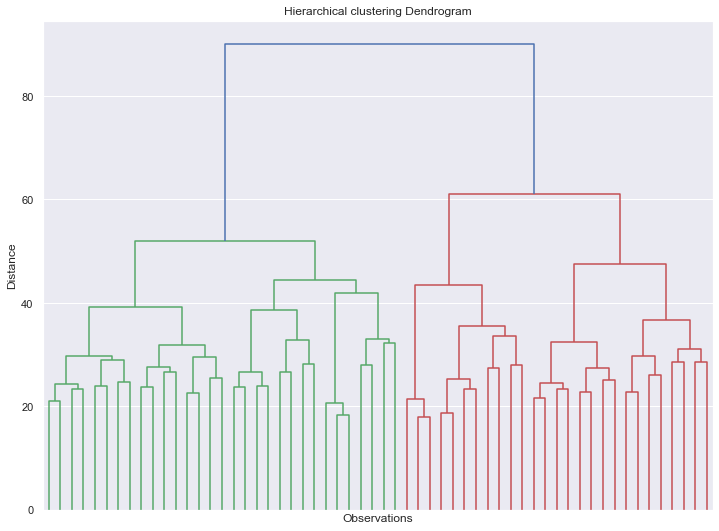

In [269]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
          show_leaf_counts = False,
          no_labels = True)
plt.show()

In [275]:
 kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

In [285]:
Kmeans.fit(clean_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [286]:
kmeans_segm_df = clean_df.copy()

In [346]:
kmeans_segm_df['segment K-means'] = kmeans.labels_

AttributeError: 'KMeans' object has no attribute 'labels_'

In [292]:
pca = PCA()

In [293]:
pca.fit(clean_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [294]:
pca.explained_variance_ratio_

array([5.17864405e-01, 6.74883092e-02, 2.49671158e-02, 2.05556330e-02,
       1.91532089e-02, 1.61175412e-02, 1.25663312e-02, 1.09884435e-02,
       9.36794595e-03, 9.22968228e-03, 8.21092225e-03, 7.39649721e-03,
       7.05544735e-03, 6.74900236e-03, 6.45469976e-03, 6.17330989e-03,
       5.57049810e-03, 5.30600080e-03, 5.22280969e-03, 5.11097471e-03,
       4.90707043e-03, 4.80062520e-03, 4.69583601e-03, 4.58244771e-03,
       4.48671555e-03, 4.29199027e-03, 4.14526774e-03, 3.91812788e-03,
       3.80673185e-03, 3.73175901e-03, 3.65626264e-03, 3.62656430e-03,
       3.54079343e-03, 3.50403189e-03, 3.46612626e-03, 3.38438216e-03,
       3.26869506e-03, 3.22061465e-03, 3.16429234e-03, 3.09223696e-03,
       3.03787507e-03, 2.99534848e-03, 2.95222565e-03, 2.86314206e-03,
       2.81660442e-03, 2.78368435e-03, 2.77057938e-03, 2.67184454e-03,
       2.64679986e-03, 2.60115606e-03, 2.52604480e-03, 2.47816159e-03,
       2.44490870e-03, 2.43491443e-03, 2.40074828e-03, 2.33885752e-03,
      

In [296]:
pca = PCA(n_components = 12)

In [297]:
pca.fit(clean_df)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [298]:
pca.components_

array([[-3.96505559e-03,  5.96487586e-03, -2.79264100e-03, ...,
        -3.06836930e-04,  1.82576452e-04, -1.14407320e-05],
       [-2.30616430e-03, -2.92608417e-03,  1.82026696e-02, ...,
         1.62571631e-03, -6.83072514e-03,  6.83648608e-03],
       [ 1.76395450e-02, -1.77923384e-02,  1.27417426e-02, ...,
         5.58356642e-03, -3.93625266e-03,  4.34228465e-03],
       ...,
       [ 6.97384080e-03,  3.47535600e-02, -5.11801933e-02, ...,
        -1.64696322e-02,  1.25518168e-02, -1.20950339e-02],
       [-1.23894079e-02,  4.07935134e-03,  8.09018391e-02, ...,
         2.14239390e-02, -2.01885805e-02,  1.97650603e-02],
       [ 1.98514426e-02,  2.34476521e-03,  1.33727940e-01, ...,
        -1.69630646e-02,  2.53608915e-02, -2.62303347e-02]])

In [300]:
df_pca_com = pd.DataFrame(data=pca.components_,
                         columns = clean_df.columns.values,
                         index = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12'])
df_pca_com

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,current smoker,former smoker,never smoked,tried smoking,drink a lot,never,social drinker,i am always on time,i am often early,i am often running late,everytime it suits me,never,only to avoid hurting someone,sometimes,few hours a day,less than an hour a day,most of the day,no time at all,female,male,left handed,right handed,college/bachelor degree,currently a primary school pupil,doctorate degree,masters degree,primary school,secondary school,no,yes,city,village,block of flats,house/bungalow
C1,-0.003965,0.005965,-0.002793,-0.003197,0.005190,0.000036,-0.013512,-0.010686,0.000659,0.014511,0.004367,0.008678,0.002386,-0.000406,-0.001550,0.000803,-0.016636,0.010835,0.000268,-0.002219,0.010328,0.014741,0.000352,-0.025401,0.019715,0.023295,-0.016356,-0.012218,0.009061,0.020259,0.026066,0.006599,-0.011210,0.012538,0.013917,0.020822,0.006748,0.032048,0.001487,-0.008677,-0.004484,-0.020623,0.003087,-0.011237,-0.008422,-0.000064,0.030821,-0.014971,-0.005521,-0.008722,-0.026524,-0.003547,0.000375,0.006671,0.013013,-0.010100,-0.011618,-0.027326,0.025527,-0.017350,-0.000949,0.013293,-0.012062,-0.007310,-0.015216,-0.021080,-0.001931,-0.021660,-0.015837,-0.014869,-0.010107,-0.016541,-0.007256,-0.005244,0.008106,-0.004996,-0.017959,-0.003297,0.001803,-0.006065,-0.001618,0.003938,-0.001207,-0.007232,0.014230,0.005359,0.013696,-0.007694,0.003672,-0.003198,-0.001659,-0.006392,-0.011644,0.003434,-0.013939,-0.013213,-0.007189,-0.003885,-0.002095,-0.007514,-0.000585,-0.013082,0.000254,-0.001358,0.000855,0.001763,0.000840,-0.010970,-0.009412,-0.001659,0.003384,-0.001566,-0.011182,0.004974,-0.004728,0.003893,-0.009220,-0.004860,-0.037758,0.001756,-0.000929,0.016775,0.003503,-0.008550,-0.003909,0.004828,-0.005307,-0.008868,-0.009841,-0.016860,0.011309,0.012680,-0.009174,0.021879,0.001581,0.036091,0.510687,0.846929,-0.000586,0.000987,0.001064,0.000316,-0.002492,0.002766,0.001187,-0.004032,0.001003,0.000909,-0.001874,0.001724,-0.000210,0.001533,-0.003047,-0.000581,-0.001804,0.002385,-0.0,-0.022226,0.022162,0.000953,-0.000973,-0.000209,-0.000157,0.000728,0.000890,-0.001161,-0.000091,-0.000032,0.000054,0.000218,-0.000307,0.000183,-0.000011
C2,-0.002306,-0.002926,0.018203,0.021872,0.014125,0.020576,0.043844,0.015908,0.008741,0.008896,0.006425,0.004642,0.0

In [301]:
pca.transform(clean_std)

array([[-146.47678093,  106.13879275,  -39.98849845, ...,   -4.58408937,
          -1.84682224,   -7.92704903],
       [-145.4018954 ,  106.20348164,  -42.02826793, ...,   -3.81006546,
          -2.41135585,   -6.4657568 ],
       [-144.7157363 ,  106.57757602,  -35.64674893, ...,   -5.27240845,
           2.25328623,   -5.05787724],
       ...,
       [-144.1409479 ,  105.94562993,  -44.42111905, ...,   -3.05268685,
          -0.92217895,   -3.1132184 ],
       [-145.51571456,  106.08233997,  -38.7113135 , ...,   -3.052874  ,
           1.58265702,   -5.8431476 ],
       [-143.59596477,  105.01419652,  -40.19342938, ...,   -2.76663533,
           0.19075719,   -9.62169817]])

In [302]:
scores_pca = pca.transform(clean_std)

In [303]:
wcss = []
for i in range(1,180):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

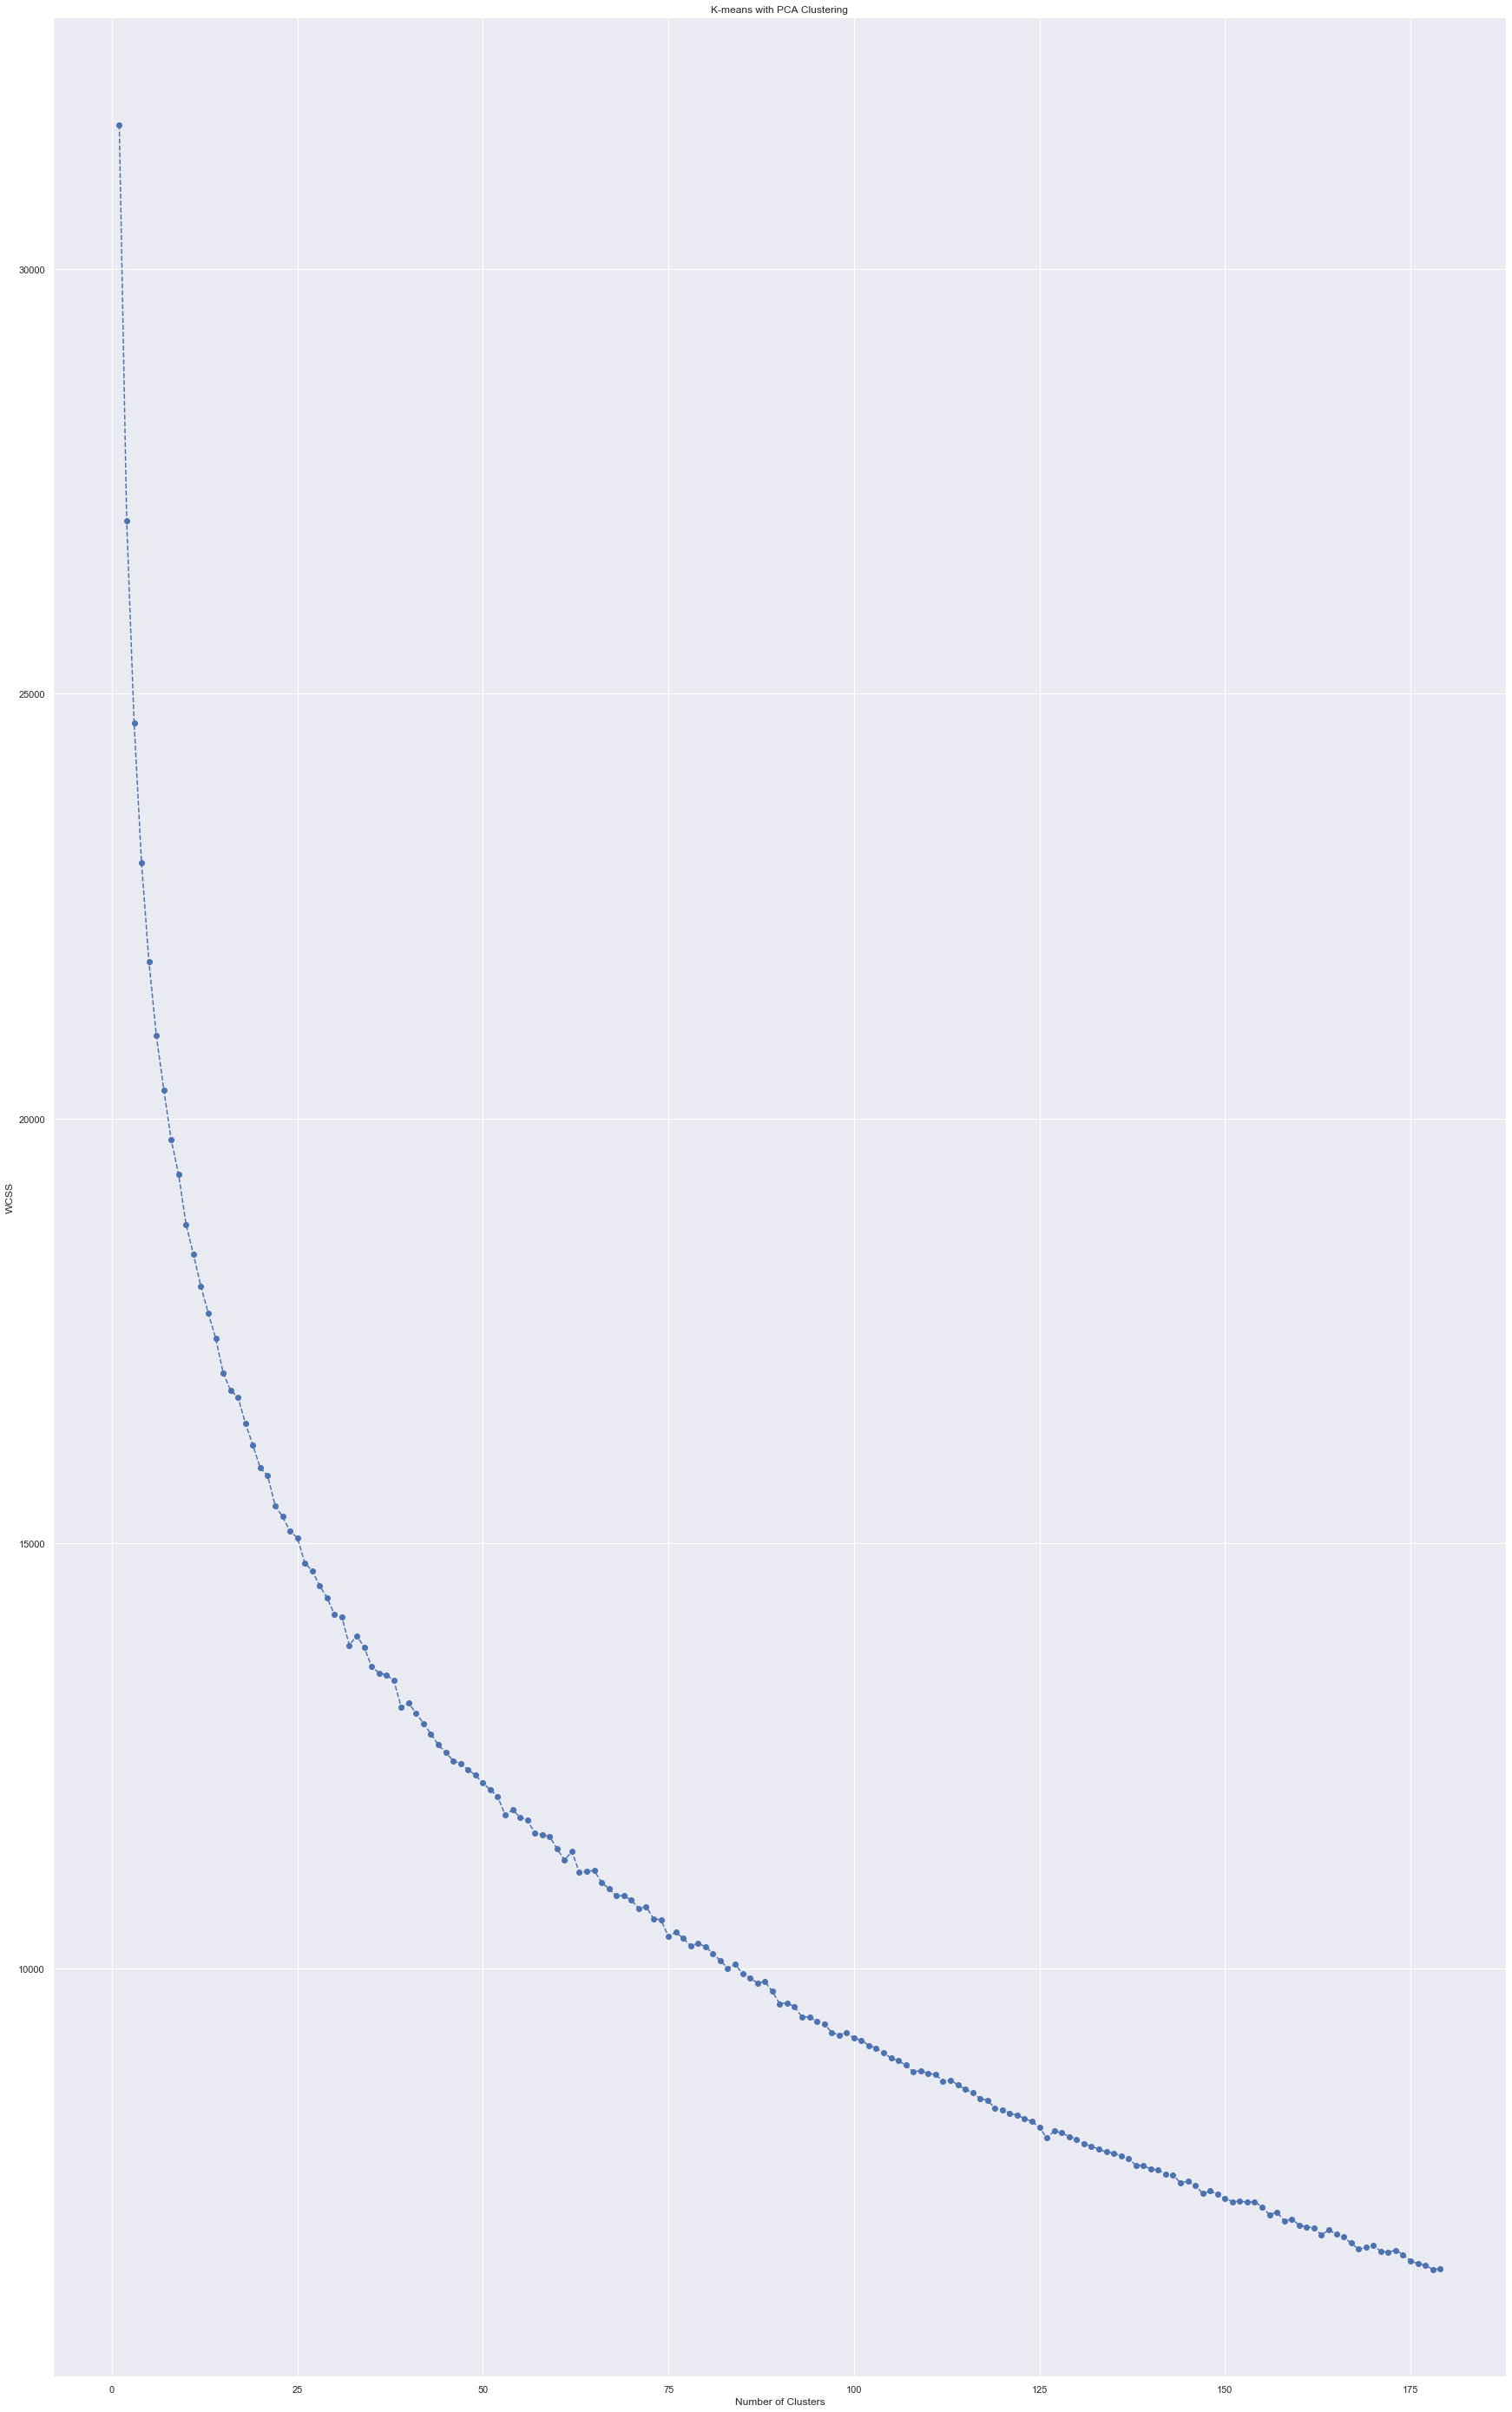

In [322]:
plt.figure(figsize=(30,50))
plt.plot(range(1,180), wcss, marker = 'o',linestyle= '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [342]:
db = DBSCAN(eps=50, min_samples=60)

In [343]:
db.fit(clean_std)

DBSCAN(algorithm='auto', eps=50, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=60, n_jobs=None, p=None)

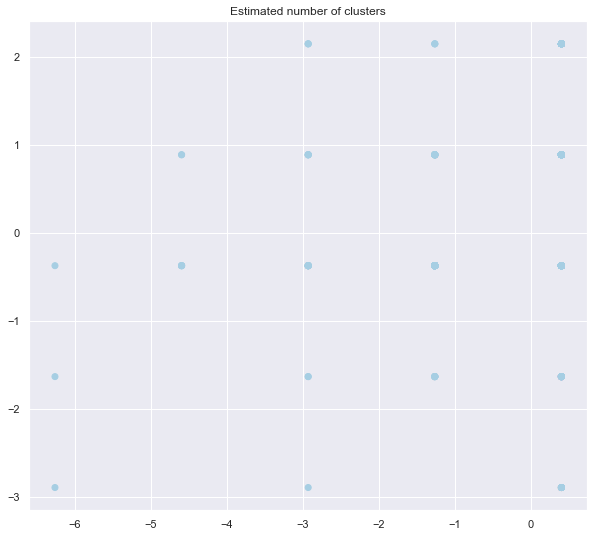

In [344]:
y_pred = db.fit_predict(clean_std)
plt.figure(figsize=(10,9))
plt.scatter(clean_std[:,0],clean_std[:,1], c = y_pred, cmap ='Paired')
plt.title('Estimated number of clusters')
plt.show()